In [ ]:
import pandas as pd
data = pd.read_csv('/content/heart.csv')

In [ ]:
data = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [ ]:
X = data.drop(columns='target', axis=1)
Y = data['target']
print(X)
print(Y)

      age  trestbps  chol  thalach  oldpeak  sex_0  sex_1   cp_0   cp_1  \
0      52       125   212      168      1.0  False   True   True  False   
1      53       140   203      155      3.1  False   True   True  False   
2      70       145   174      125      2.6  False   True   True  False   
3      61       148   203      161      0.0  False   True   True  False   
4      62       138   294      106      1.9   True  False   True  False   
...   ...       ...   ...      ...      ...    ...    ...    ...    ...   
1020   59       140   221      164      0.0  False   True  False   True   
1021   60       125   258      141      2.8  False   True   True  False   
1022   47       110   275      118      1.0  False   True   True  False   
1023   50       110   254      159      0.0   True  False   True  False   
1024   54       120   188      113      1.4  False   True   True  False   

       cp_2  ...  slope_2   ca_0   ca_1   ca_2   ca_3   ca_4  thal_0  thal_1  \
0     False  ...   

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(columns='target', axis=1)
Y = data['target']
#split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
import pandas as pd
#Standardiztion of data
scaler_class= StandardScaler()
X_train_scaled =scaler_class.fit_transform(X_train)
X_test_scaled =scaler_class.transform(X_test)
#DecisionTreeClassifier
DT= DecisionTreeClassifier(random_state=42)
DT.fit(X_train_scaled,Y_train)
#Predict using the DecisionTreeClassifier
y_pred_DT =DT.predict(X_test_scaled)
#Evaluate the model
accuracy_DT= accuracy_score(Y_test , y_pred_DT)
classification_report_DT= classification_report(Y_test , y_pred_DT)
confusion_matrix_DT= confusion_matrix(Y_test , y_pred_DT)
print(f"DecisionTreeClassifier Classification Accuracy: {accuracy_DT}")
print(f"DecisionTreeClassifier Classification classification_report: {classification_report_DT}")
print(f"DecisionTreeClassifier Classification confusion_matrix: {confusion_matrix_DT}")

DecisionTreeClassifier Classification Accuracy: 0.9853658536585366
DecisionTreeClassifier Classification classification_report:               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

DecisionTreeClassifier Classification confusion_matrix: [[102   0]
 [  3 100]]


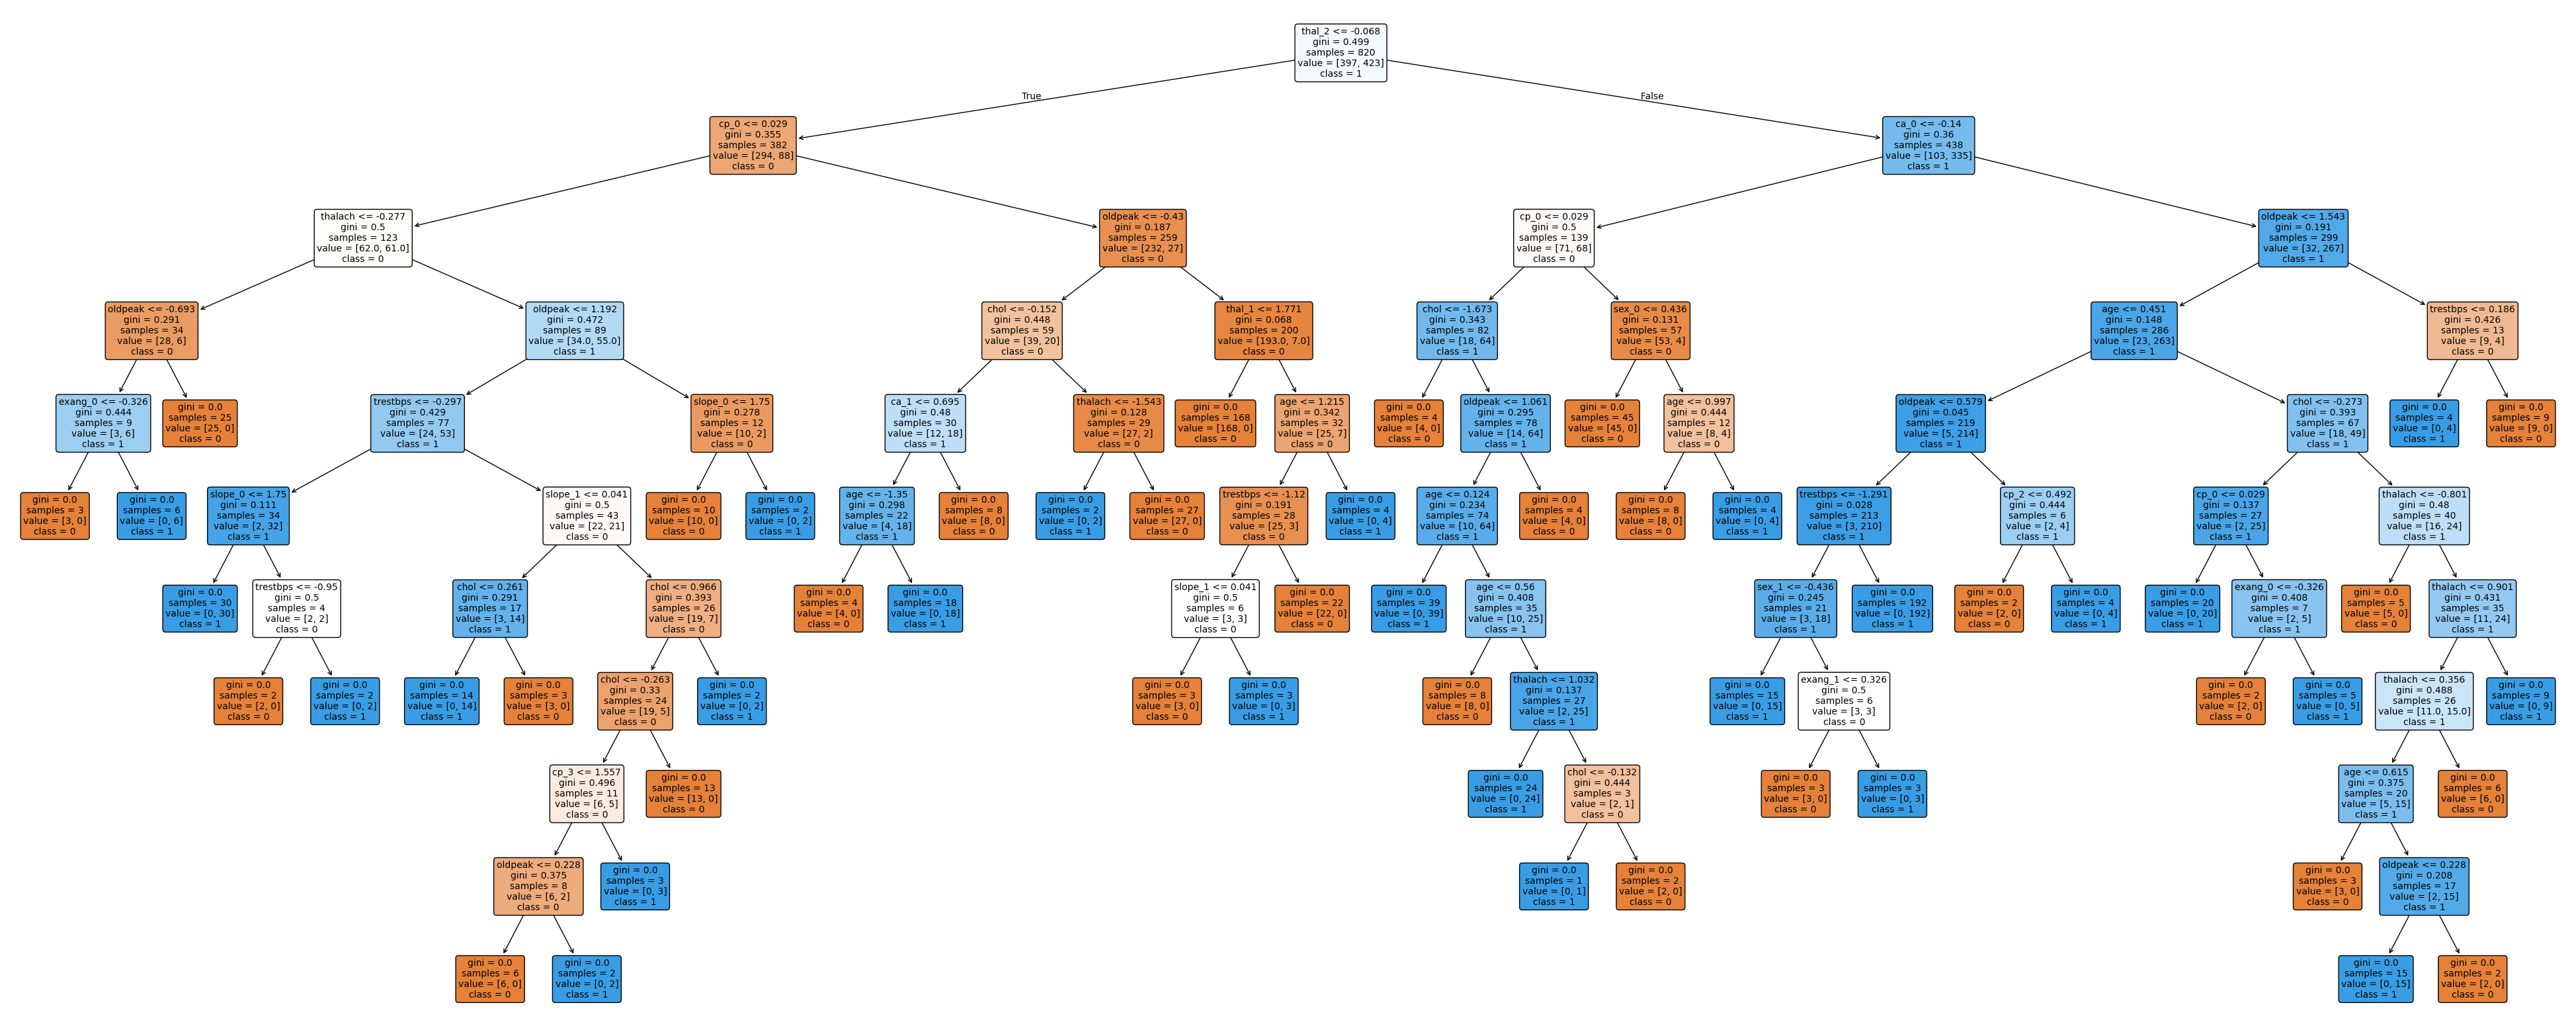

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Ensure class_names is a list of strings
class_names = [str(cls) for cls in DT.classes_]

# Draw the Decision Tree
plt.figure(figsize=(50, 20))
plot_tree(DT, filled=True, feature_names=X_train.columns, class_names=class_names, rounded=True, fontsize=10)
plt.show()